## 1. Set up working environment

In [110]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ANCOMBC")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.23), R 4.3.2 (2023-10-31 ucrt)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ANCOMBC'"
Old packages: 'colorspace', 'yaml', 'cli', 'digest', 'fastmap', 'htmltools',
  'parallelly', 'rlang'



In [111]:
library("ANCOMBC")
library(phyloseq)
library(mia)
library(tidyverse)

In [2]:
setwd("C:/Users/trang/OneDrive/Máy tính/New folder/Meta_Genomics/ANCOMBC")
getwd()

[1] "C:/Users/trang/OneDrive/Máy tính/New folder/Meta_Genomics/ANCOMBC"

## 2. Dataset

In [109]:
load('smd') # metadata
load('otu_data') # count data

In [4]:
head(smd,3)
tail(smd,3)

,stand_bmi,stand_choles,health_status
,<dbl>,<dbl>,<fct>
S1,-7.046117,-0.05133271,1
S2,-8.183509,-1.30178093,1
S3,-7.369319,-1.20561056,1


,stand_bmi,stand_choles,health_status
,<dbl>,<dbl>,<fct>
S148,-2.439321,0.5519218,3
S149,-3.094921,0.7709166,3
S150,-2.664466,-0.5753851,3


In [6]:
# 3 levels of heatlh status
table(smd$health_status)


 1  2  3 
50 50 50 

In [112]:
# Meta data of each sample in extended form
smd_dmy = model.matrix(~ 0 + stand_choles  + health_status, data = smd)
head(smd_dmy,3)

,stand_choles,health_status1,health_status2,health_status3
S1,-0.05133271,1,0,0
S2,-1.30178093,1,0,0
S3,-1.20561056,1,0,0


In [113]:
tail(smd_dmy,3)

,stand_choles,health_status1,health_status2,health_status3
S148,0.5519218,0,0,1
S149,0.7709166,0,0,1
S150,-0.5753851,0,0,1


In [8]:
head(otu_data,7) # raw count data

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
T1,1,0,1,3,2,0,1,0,0,3,⋯,142,2,208,232,105,64,317,41,320,14
T2,102,1,156,535,178,0,99,21,28,400,⋯,41555,940,69158,150981,68451,40298,258659,23841,79188,7491
T3,0,0,0,0,0,0,0,0,0,0,⋯,17,0,22,23,10,7,32,4,35,2
T4,4,0,7,23,11,0,6,1,1,19,⋯,913,12,1364,1673,767,465,2340,293,2036,96
T5,38,0,65,214,90,0,52,7,9,173,⋯,7678,118,11913,17441,7893,4766,26071,2888,16343,975
T6,15,0,26,85,38,0,23,3,3,70,⋯,3302,45,4985,6334,2864,1756,8992,1100,7295,364
T7,11,0,18,60,27,0,15,2,2,50,⋯,6187,87,9441,12614,5712,3455,18203,2122,13587,724


## 3.1 Differential Abundance Analysis: Health status 1 and 2

In [33]:
# Meta data
head(smd,3)

,stand_bmi,stand_choles,health_status
,<dbl>,<dbl>,<fct>
S1,-7.046117,-0.05133271,1
S2,-8.183509,-1.30178093,1
S3,-7.369319,-1.20561056,1


In [34]:
table(smd$health_status)


 1  2  3 
50 50 50 

In [35]:
# Meta data : Choose only sample with health status 1 or 2
smd_H1_H2 = smd[smd$health_status != 3,]
smd_H1_H2$health_status = factor(smd_H1_H2$health_status, levels = c(1,2))
table(smd_H1_H2$health_status)


 1  2 
50 50 

In [36]:
# Count data
head(otu_data,2)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
T1,1,0,1,3,2,0,1,0,0,3,⋯,142,2,208,232,105,64,317,41,320,14
T2,102,1,156,535,178,0,99,21,28,400,⋯,41555,940,69158,150981,68451,40298,258659,23841,79188,7491


In [37]:
# Count data : Choose only sample with health status 1 or 2
otu_data_H1_H2 <- otu_data[, colnames(otu_data) %in% rownames(smd_H1_H2)]
dim(otu_data_H1_H2)
head(otu_data_H1_H2,3)

[1]  91 100

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S91,S92,S93,S94,S95,S96,S97,S98,S99,S100
T1,1,0,1,3,2,0,1,0,0,3,⋯,51,8,0,0,0,29,4,22,0,1
T2,102,1,156,535,178,0,99,21,28,400,⋯,1213,256,9,1,1,787,76,783,0,11
T3,0,0,0,0,0,0,0,0,0,0,⋯,5,1,0,0,0,3,0,2,0,0


In [38]:
# Create the tse object
assays = S4Vectors::SimpleList(counts = otu_data_H1_H2) # count data
smd_H1_H2 = S4Vectors::DataFrame(smd_H1_H2) # meta data
tse = TreeSummarizedExperiment::TreeSummarizedExperiment(assays = assays, colData = smd_H1_H2)

In [39]:
tse

class: TreeSummarizedExperiment 
dim: 91 100 
metadata(0):
assays(1): counts
rownames(91): T1 T2 ... T90 T91
rowData names(0):
colnames(100): S1 S2 ... S99 S100
colData names(3): stand_bmi stand_choles health_status
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
rowLinks: NULL
rowTree: NULL
colLinks: NULL
colTree: NULL

In [40]:
set.seed(123)
output = ancombc2(data = tse, 
                  assay_name = "counts",
                  fix_formula = "health_status", # response ~ covariate
                  p_adj_method = "holm",
                  pseudo_sens = TRUE,                 # sensitivity analysis to the pseudo-count addition
                  prv_cut = 0.10,                     # (0,1) Taxa with prevalences less than prv_cut will be excluded
                  lib_cut = 1000,                     # filter sampling with sampling depth
                  s0_perc = 0.05,                     # advoid significant feature due to small standard error, (rare taxa)
                  group = "health_status",            # Group to be differencially analyzed (healthy status - 1,2)             
                  alpha = 0.05,                       # Level of significant
                  n_cl = 2,                           # CPU cores to compute
                  verbose = TRUE,
                  pairwise = FALSE,                   # CUP cores to compute
                  iter_control = list(tol = 1e-5, max_iter = 20, # Liner regression model parameter
                                      verbose = FALSE),
                  em_control = list(tol = 1e-5, max_iter = 100),
                  lme_control = NULL, 
                  mdfdr_control = list(fwer_ctrl_method = "holm", B = 100))

Warning message:
"The group variable has < 3 categories 
The multi-group comparisons (global/pairwise/dunnet/trend) will be deactivated"
Obtaining initial estimates ...

Estimating sample-specific biases ...

Warning message in sqrt(sweep(var_hat, 2, var_delta, "*")):
"NaNs produced"
Sensitivity analysis for pseudo-count addition to 0s: ...

ANCOM-BC2 primary results ...



In [41]:
head(output$feature_table,2)

,S1,S3,S4,S5,S7,S8,S9,S10,S11,S12,⋯,S89,S90,S91,S92,S93,S94,S96,S97,S98,S100
T1,1,1,3,2,1,0,0,3,0,3,⋯,0,1,51,8,0,0,29,4,22,1
T2,102,156,535,178,99,21,28,400,60,486,⋯,5,26,1213,256,9,1,787,76,783,11


In [42]:
head(output$bias_correct_log_table,2)

,S1,S3,S4,S5,S7,S8,S9,S10,S11,S12,⋯,S89,S90,S91,S92,S93,S94,S96,S97,S98,S100
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T1,-0.138931,-0.4848042,-0.7692875,-0.4039632,-0.5681792,NA,NA,-0.4074126,NA,-0.8452492,⋯,NA,-1.027670,-0.5299654,-0.9886069,NA,NA,-0.8305132,-0.6235703,-0.9671347,-0.1206625
T2,1.055422,1.1344323,0.9837475,0.6540537,0.5963212,1.154336,0.8960626,1.0548202,1.206111,0.8117277,⋯,-1.50715,-1.200193,-0.7915586,-0.9534905,-0.7103483,-1.481377,-0.9602002,-1.1097508,-0.8256639,-1.1533867


In [43]:
colnames(output$res)

[1] "taxon"                    "lfc_(Intercept)"         
 [3] "lfc_health_status2"       "se_(Intercept)"          
 [5] "se_health_status2"        "W_(Intercept)"           
 [7] "W_health_status2"         "p_(Intercept)"           
 [9] "p_health_status2"         "q_(Intercept)"           
[11] "q_health_status2"         "diff_(Intercept)"        
[13] "diff_health_status2"      "passed_ss_(Intercept)"   
[15] "passed_ss_health_status2"

In [44]:
head(output$res,2)

,taxon,lfc_(Intercept),lfc_health_status2,se_(Intercept),se_health_status2,W_(Intercept),W_health_status2,p_(Intercept),p_health_status2,q_(Intercept),q_health_status2,diff_(Intercept),diff_health_status2,passed_ss_(Intercept),passed_ss_health_status2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,T1,-0.6815617,-0.06342587,0.04311135,0.07016352,-15.80933,-0.9039722,1.821665e-24,3.692016e-01,1.439115e-22,1.000000e+00,TRUE,FALSE,FALSE,FALSE
2,T2,1.0222721,-1.99577204,0.05060129,0.06833953,20.20249,-29.2037721,2.143589e-35,5.258069e-48,1.907794e-33,4.679681e-46,TRUE,TRUE,TRUE,TRUE


In [45]:
# lfc_cont_cov: Log-fold change for the continuous covariate
# lfc_cat_cov2: Log-fold change for the categorical 2 to the reference category 1
# se: standard error of log fold change
# W: Test statistic for the log-fold change (Wald statistic test ~ t test with no variance assumption)
# diff: log fold change is different from zero?
# pass: pass the sensitivity analysis

## 3.2 Differential Abundance Analysis: Health status 1, 2 and 3

In [46]:
# Meta data
head(smd,3)
dim(smd)

,stand_bmi,stand_choles,health_status
,<dbl>,<dbl>,<fct>
S1,-7.046117,-0.05133271,1
S2,-8.183509,-1.30178093,1
S3,-7.369319,-1.20561056,1


[1] 150   3

In [28]:
# Count data
head(otu_data,2)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
T1,1,0,1,3,2,0,1,0,0,3,⋯,142,2,208,232,105,64,317,41,320,14
T2,102,1,156,535,178,0,99,21,28,400,⋯,41555,940,69158,150981,68451,40298,258659,23841,79188,7491


In [47]:
# Create the tse object
assays = S4Vectors::SimpleList(counts = otu_data) # count data
smd_3H = S4Vectors::DataFrame(smd) # meta data
tse = TreeSummarizedExperiment::TreeSummarizedExperiment(assays = assays, colData = smd_3H)

In [50]:
set.seed(123)
output = ancombc2(data = tse, 
                  assay_name = "counts",
                  fix_formula = "health_status", # formular for linear regression model: response ~ covariate1 + covariate2
                  p_adj_method = "holm",
                  pseudo_sens = TRUE,                 # sensitivity analysis to the pseudo-count addition
                  prv_cut = 0.10,                     # (0,1) Taxa with prevalences less than prv_cut will be excluded
                  lib_cut = 1000,                     # filter sampling with sampling depth
                  s0_perc = 0.05,                     # advoid significant feature due to small standard error, (rare taxa)
                  group = "health_status",            # Group to be differencially analyzed (healthy status - normal,A,B             
                  alpha = 0.05,                       # Level of significant
                  n_cl = 2,                           # CUP cores to compute
                  verbose = TRUE,
                  pairwise = TRUE,                   
                  iter_control = list(tol = 1e-5, max_iter = 20, # Liner regression model parameter
                                      verbose = FALSE),
                  em_control = list(tol = 1e-5, max_iter = 100),
                  lme_control = NULL, 
                  mdfdr_control = list(fwer_ctrl_method = "holm", B = 100))

Obtaining initial estimates ...

Estimating sample-specific biases ...

Sensitivity analysis for pseudo-count addition to 0s: ...

ANCOM-BC2 primary results ...

ANCOM-BC2 multiple pairwise comparisons ...



In [51]:
head(output$res_pair,4)

,taxon,lfc_health_status2,lfc_health_status3,lfc_health_status3_health_status2,se_health_status2,se_health_status3,se_health_status3_health_status2,W_health_status2,W_health_status3,W_health_status3_health_status2,⋯,p_health_status3_health_status2,q_health_status2,q_health_status3,q_health_status3_health_status2,diff_health_status2,diff_health_status3,diff_health_status3_health_status2,passed_ss_health_status2,passed_ss_health_status3,passed_ss_health_status3_health_status2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,T1,-0.06827952,-0.06796177,0.0003177525,0.09406369,0.09558814,0.08748904,-0.7258861,-0.7109854,0.003631912,⋯,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,T2,-2.00062569,1.00584236,3.0064680500,0.06866012,0.06751198,0.08178809,-29.1381035,14.8987239,36.759241928,⋯,8.507227e-74,2.760942e-60,1.061862e-29,9.676971e-73,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
3,T3,-0.75218203,-0.71827224,0.0339097941,0.13448308,0.13622569,0.09292088,-5.5931349,-5.2726637,0.364931927,⋯,7.164041e-01,6.093504e-06,1.874949e-05,1.000000e+00,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
4,T4,0.02750635,0.02336361,-0.0041427448,0.06301810,0.06939446,0.07585942,0.4364834,0.3366783,-0.054610814,⋯,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [52]:
0.06827952 - 0.06796177

[1] 0.00031775

In [53]:
2.00062569 + 1.00584236

[1] 3.006468

## 3.3 Differential Abundance Analysis: Continuous covariate (choles level)

In [5]:
# Meta data
head(smd,3)
# Count data
head(otu_data,2)

,stand_bmi,stand_choles,health_status
,<dbl>,<dbl>,<fct>
S1,-7.046117,-0.05133271,1
S2,-8.183509,-1.30178093,1
S3,-7.369319,-1.20561056,1


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
T1,1,0,1,3,2,0,1,0,0,3,⋯,142,2,208,232,105,64,317,41,320,14
T2,102,1,156,535,178,0,99,21,28,400,⋯,41555,940,69158,150981,68451,40298,258659,23841,79188,7491


In [7]:
# Create the tse object
assays = S4Vectors::SimpleList(counts = otu_data) # count data
smd_con = S4Vectors::DataFrame(smd) # meta data
tse = TreeSummarizedExperiment::TreeSummarizedExperiment(assays = assays, colData = smd_con)

In [8]:
set.seed(123)
output = ancombc2(data = tse, 
                  assay_name = "counts",
                  fix_formula = "stand_choles", # formular for linear regression model: response ~ covariate1 + covariate2
                  p_adj_method = "holm",
                  pseudo_sens = TRUE,                 # sensitivity analysis to the pseudo-count addition
                  prv_cut = 0.10,                     # (0,1) Taxa with prevalences less than prv_cut will be excluded
                  lib_cut = 1000,                     # filter sampling with sampling depth
                  s0_perc = 0.05,                     # advoid significant feature due to small standard error, (rare taxa)
              #    group = "health_status",            # Group to be differencially analyzed (healthy status - normal,A,B             
                  alpha = 0.05,                       # Level of significant
                  n_cl = 2,                           # CUP cores to compute
                  verbose = TRUE,
             #     pairwise = TRUE,                  
                  iter_control = list(tol = 1e-5, max_iter = 20, # Liner regression model parameter
                                      verbose = FALSE),
                  em_control = list(tol = 1e-5, max_iter = 100),
                  lme_control = NULL, 
                  mdfdr_control = list(fwer_ctrl_method = "holm", B = 100))

Obtaining initial estimates ...

Estimating sample-specific biases ...

Sensitivity analysis for pseudo-count addition to 0s: ...

ANCOM-BC2 primary results ...



In [10]:
head(output$res, 4)

,taxon,lfc_(Intercept),lfc_stand_choles,se_(Intercept),se_stand_choles,W_(Intercept),W_stand_choles,p_(Intercept),p_stand_choles,q_(Intercept),q_stand_choles,diff_(Intercept),diff_stand_choles,passed_ss_(Intercept),passed_ss_stand_choles
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,T1,-0.67994988,0.030468553,0.02437539,0.02324272,-27.8949303,1.3108861,2.856327e-53,0.19248550,2.285061e-51,1,TRUE,FALSE,FALSE,FALSE
2,T2,0.01046647,-0.159244130,0.09903658,0.09593896,0.1056829,-1.6598484,9.159841e-01,0.09916742,1.000000e+00,1,FALSE,FALSE,TRUE,TRUE
3,T3,-2.13141147,-0.007092409,0.02783238,0.02778904,-76.5802796,-0.2552232,6.862424e-64,0.79938209,6.083494e-62,1,TRUE,FALSE,FALSE,FALSE
4,T4,-0.02993724,0.005782460,0.01861777,0.02042012,-1.6079927,0.2831747,1.100897e-01,0.77746125,1.000000e+00,1,FALSE,FALSE,TRUE,TRUE


## 3.4 Differential Abundance Analysis: Continuous covariate (choles level) + Categorical variable (Health status 1,2,3)

In [11]:
# Meta data
head(smd,3)
# Count data
head(otu_data,2)

,stand_bmi,stand_choles,health_status
,<dbl>,<dbl>,<fct>
S1,-7.046117,-0.05133271,1
S2,-8.183509,-1.30178093,1
S3,-7.369319,-1.20561056,1


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
T1,1,0,1,3,2,0,1,0,0,3,⋯,142,2,208,232,105,64,317,41,320,14
T2,102,1,156,535,178,0,99,21,28,400,⋯,41555,940,69158,150981,68451,40298,258659,23841,79188,7491


In [ ]:
# Create the tse object
assays = S4Vectors::SimpleList(counts = otu_data) # count data
smd_3H = S4Vectors::DataFrame(smd) # meta data
tse = TreeSummarizedExperiment::TreeSummarizedExperiment(assays = assays, colData = smd_3H)

In [12]:
set.seed(123)
output = ancombc2(data = tse, 
                  assay_name = "counts",
                  fix_formula = "stand_choles + health_status", # formular for linear regression model: response ~ covariate1 + covariate2
                  p_adj_method = "holm",
                  pseudo_sens = TRUE,                 # sensitivity analysis to the pseudo-count addition
                  prv_cut = 0.10,                     # (0,1) Taxa with prevalences less than prv_cut will be excluded
                  lib_cut = 1000,                     # filter sampling with sampling depth
                  s0_perc = 0.05,                     # advoid significant feature due to small standard error, (rare taxa)
                  group = "health_status",            # Group to be differencially analyzed (healthy status - normal,A,B             
                  alpha = 0.05,                       # Level of significant
                  n_cl = 2,                           # CUP cores to compute
                  verbose = TRUE,
                  pairwise = TRUE,                   # CUP cores to compute
                  iter_control = list(tol = 1e-5, max_iter = 20, # Liner regression model parameter
                                      verbose = FALSE),
                  em_control = list(tol = 1e-5, max_iter = 100),
                  lme_control = NULL, 
                  mdfdr_control = list(fwer_ctrl_method = "holm", B = 100))

Obtaining initial estimates ...

Estimating sample-specific biases ...

Sensitivity analysis for pseudo-count addition to 0s: ...

ANCOM-BC2 primary results ...

ANCOM-BC2 multiple pairwise comparisons ...



In [13]:
head(output$res, 4)

,taxon,lfc_(Intercept),lfc_stand_choles,lfc_health_status2,lfc_health_status3,se_(Intercept),se_stand_choles,se_health_status2,se_health_status3,W_(Intercept),⋯,q_health_status2,q_health_status3,diff_(Intercept),diff_stand_choles,diff_health_status2,diff_health_status3,passed_ss_(Intercept),passed_ss_stand_choles,passed_ss_health_status2,passed_ss_health_status3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,T1,-0.6597409,0.030997815,-0.03692064,-0.02252950,0.05046109,0.02209994,0.08283890,0.08287436,-13.074251,⋯,1.000000e+00,1.000000e+00,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,T2,0.3163284,-0.015585963,-2.00692293,0.98887925,0.02811085,0.01591812,0.03515360,0.03680906,11.252893,⋯,2.018298e-96,5.928845e-55,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
3,T3,-1.2393678,-0.028958697,-0.92761498,-0.89656130,0.06904852,0.02909475,0.12633810,0.13062341,-17.949231,⋯,5.015500e-08,3.335914e-07,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
4,T4,-0.0420827,0.009269526,0.01861696,0.01487885,0.03146651,0.01529956,0.03787916,0.03601447,-1.337381,⋯,1.000000e+00,1.000000e+00,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE


In [ ]:
# log(count) = intercept + log_fold_change1 * healthy_status1 
#                        + log_fold_change2 * healthy_status2 
#                        + log_fold_change3 * healthy_status3

In [15]:
head(output$res_pair,4)

,taxon,lfc_health_status2,lfc_health_status3,lfc_health_status3_health_status2,se_health_status2,se_health_status3,se_health_status3_health_status2,W_health_status2,W_health_status3,W_health_status3_health_status2,⋯,p_health_status3_health_status2,q_health_status2,q_health_status3,q_health_status3_health_status2,diff_health_status2,diff_health_status3,diff_health_status3_health_status2,passed_ss_health_status2,passed_ss_health_status3,passed_ss_health_status3_health_status2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,T1,-0.03692064,-0.02252950,0.014391146,0.08283890,0.08287436,0.05071471,-0.4456921,-0.2718513,0.2837667,⋯,1.000000e+00,1.000000e+00,1.000000e+00,1.00000e+00,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,T2,-2.00692293,0.98887925,2.995802184,0.03515360,0.03680906,0.03928951,-57.0901149,26.8651029,76.2494187,⋯,2.692934e-115,3.900530e-97,1.103992e-55,4.90114e-114,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
3,T3,-0.92761498,-0.89656130,0.031053674,0.12633810,0.13062341,0.05287066,-7.3423215,-6.8637108,0.5873517,⋯,5.591354e-01,1.086692e-08,6.830681e-08,1.00000e+00,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE
4,T4,0.01861696,0.01487885,-0.003738113,0.03787916,0.03601447,0.03230784,0.4914830,0.4131353,-0.1157030,⋯,1.000000e+00,1.000000e+00,1.000000e+00,1.00000e+00,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


## 4. Barplot of taxa with differentially abundance

In [19]:
# Meta data
head(smd,3)
# Count data
head(otu_data,2)

,stand_bmi,stand_choles,health_status
,<dbl>,<dbl>,<fct>
S1,-7.046117,-0.05133271,1
S2,-8.183509,-1.30178093,1
S3,-7.369319,-1.20561056,1


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
T1,1,0,1,3,2,0,1,0,0,3,⋯,142,2,208,232,105,64,317,41,320,14
T2,102,1,156,535,178,0,99,21,28,400,⋯,41555,940,69158,150981,68451,40298,258659,23841,79188,7491


In [31]:
taxa2 = cbind(otu_data['T2',], smd[,'health_status'])
colnames(taxa2) = c('count', 'health_status')
head(taxa2,2)

,count,health_status
S1,102,1
S2,1,1


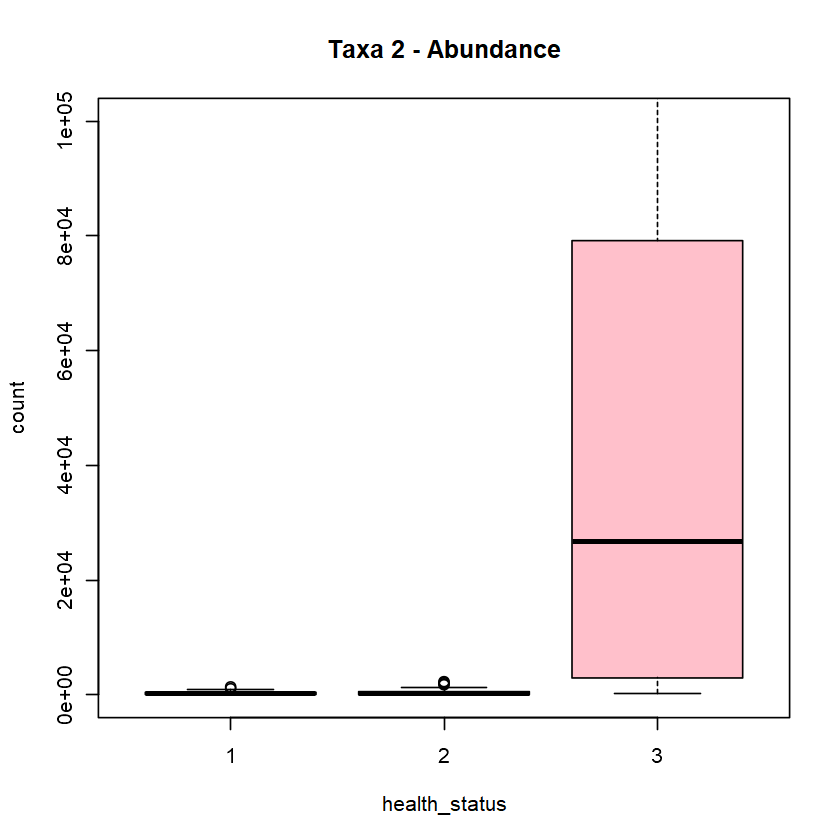

In [42]:
boxplot(count ~ health_status, data=taxa2, ylim = c(0, 1e+5), col=c("green", 'red', 'pink'),
       main="Taxa 2 - Abundance")

In [67]:
log_value = output$bias_correct_log_table
log_value

,S1,S3,S4,S5,S7,S8,S9,S10,S11,S12,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T1,-0.1078375,-0.624916,-0.7285940,-0.24781539,-0.33746108,NA,NA,-0.4915143,NA,-0.6883827,⋯,-0.4340369,-0.6018567,-0.4951947,-0.8182918,-0.8200758,-0.8071122,-0.9205346,-0.7530298,-0.3608264,-0.7311376
T2,0.3049522,0.212757,0.2428773,0.02863789,0.04547567,0.2892208,0.385502,0.1891549,0.2956597,0.1870306,⋯,1.0327260,1.3386929,1.0992331,1.4476971,1.4476542,1.4258788,1.5716465,1.4003771,0.9382495,1.3390795


,S1,S3,S4,S5,S7,S8,S9,S10,S11,S12,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
T2,0.3049522,0.212757,0.2428773,0.02863789,0.04547567,0.2892208,0.385502,0.1891549,0.2956597,0.1870306,⋯,1.032726,1.338693,1.099233,1.447697,1.447654,1.425879,1.571646,1.400377,0.9382495,1.33908


In [61]:
smd[,'health_status']

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3
Levels: 1 2 3

In [92]:
taxa2 = cbind(t(log_value['T2',]), smd$health_status)
colnames(taxa2) = c('log_value', 'health_status')

Warning message in cbind(...):
"number of rows of result is not a multiple of vector length (arg 2)"


In [94]:
head(taxa2,2)

,log_value,health_status
S1,0.3049522,1
S3,0.2127570,1


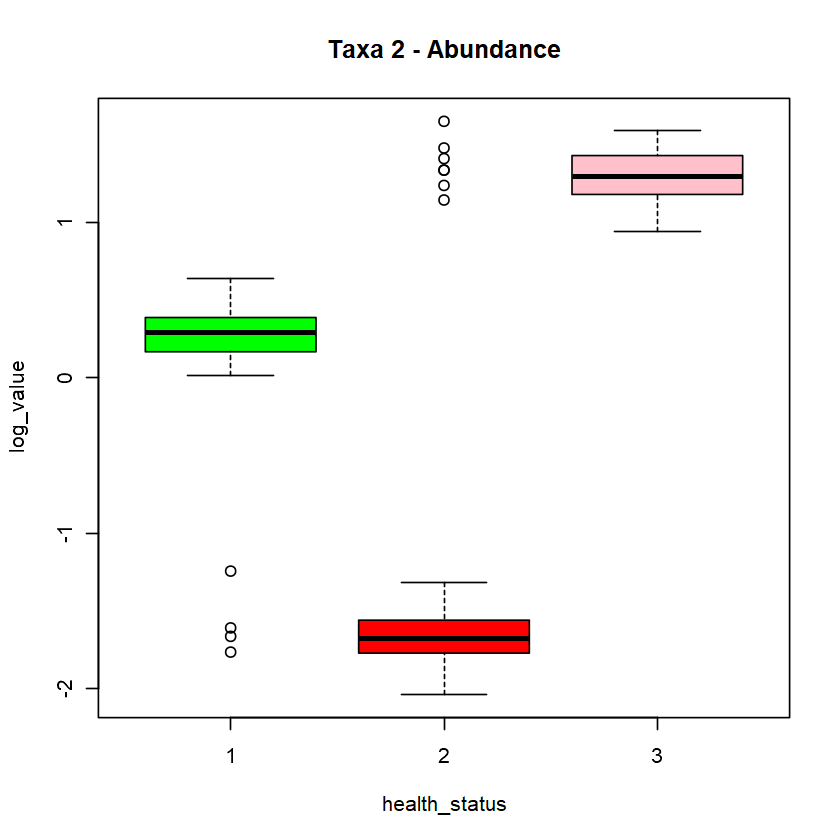

In [95]:
boxplot(log_value ~ health_status, data=taxa2, col=c("green", 'red', 'pink'),
       main="Taxa 2 - Abundance")

In [104]:
t = pairwise.t.test(taxa2[,'log_value'], taxa2[,'health_status'], p.adjust.method = "BH")
t


	Pairwise comparisons using t tests with pooled SD 

data:  taxa2[, "log_value"] and taxa2[, "health_status"] 

  1       2      
2 < 2e-16 -      
3 5.4e-12 < 2e-16

P value adjustment method: BH 

In [107]:
t$p.value

,1,2
2,9.807144e-18,NA
3,5.408914e-12,1.388275e-35


In [115]:
help(ancombc)

ancombc {ANCOMBC},R Documentation
data,"the input data. The data parameter should be either a phyloseq or a TreeSummarizedExperiment object, which consists of a feature table (microbial count table), a sample metadata table, a taxonomy table (optional), and a phylogenetic tree (optional). Ensure that the row names of the metadata table match the sample names in the feature table, and the row names of the taxonomy table match the taxon (feature) names in the feature table. For detailed information, refer to ?phyloseq::phyloseq or ?TreeSummarizedExperiment::TreeSummarizedExperiment."
assay.type,alias for assay_name.
assay_name,"character. Name of the count table in the data object (only applicable if data object is a (Tree)SummarizedExperiment). Default is ""counts"". See ?SummarizedExperiment::assay for more details."
rank,alias for tax_level.
tax_level,"character. The taxonomic level of interest. The input data can be agglomerated at different taxonomic levels based on your research interest. Default is NULL, i.e., do not perform agglomeration, and the ANCOM-BC anlysis will be performed at the lowest taxonomic level of the input data."
phyloseq,a phyloseq object. Will be deprecated.
formula,"the character string expresses how microbial absolute abundances for each taxon depend on the variables in metadata. When specifying the formula, make sure to include the group variable in the formula if it is not NULL."
p_adj_method,"character. method to adjust p-values. Default is ""holm"". Options include ""holm"", ""hochberg"", ""hommel"", ""bonferroni"", ""BH"", ""BY"", ""fdr"", ""none"". See ?stats::p.adjust for more details."
prv_cut,"a numerical fraction between 0 and 1. Taxa with prevalences (the proportion of samples in which the taxon is present) less than prv_cut will be excluded in the analysis. For example, if there are 100 samples, and a taxon has nonzero counts present in less than 100*prv_cut samples, it will not be considered in the analysis. Default is 0.10."
lib_cut,"a numerical threshold for filtering samples based on library sizes. Samples with library sizes less than lib_cut will be excluded in the analysis. Default is 0, i.e. do not discard any sample."
